---
# Application to turbulent flows
Below are two examples of data analysis of turbulent signals: *experimental signals from a turbulent jet* or *Signals from numerical simulations of Lagrangian trajectories in homogeneous turbulence*.


You are strongly advised to make a directory 'signal' in which you put the Jupyterlab notebooks as well as the directories 'jet' and 'particles' similarly to the structure on the cloud.

Figures must have labels on axes (with units when relevant)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal as sig

In [20]:
# static figures (can be exported to pdf):
# %matplotlib inline

# dynamic figures:

# for jupyter-notebook
%matplotlib notebook
# for jupyter-lab (the package ipympl is needed)  if not installed type: conda install ipympl
# %matplotlib widget

---
# Experimental signals from a turbulent jet
You can download several records from a turbulent jet made using a hot wire probe in a turbulent jet in air (in the directory 'jet' on the UGA cloud. The hot wire probe is a small wire (diameter < 5µm) which is heated through Joule effect when a small current is flowing. When air blows on the wire, it cools the wire and thus changes it resistance (proportional to temperature). The resistance can then be related to velocity through a nonlinear calibration function.

The measured quantity is one component of the velocity along the axis of the jet. The data has been resampled from time to space using the Taylor hypothesis of frozen turbulence. This hypothesis states that in a flow with strong mean flow, the turbulent structures are advected by the mean flow much faster than they evolve in time. So that the temporal measurement is actually a spatial cut of a frozen flow. The link between time a space is through the mean velocity so that $dx=-u_0 dt$. Thus the signal of velocity as a function of time is changed to a velocity component as a function of space in an equivalent spatially homogenous turbuelnce. 

The spatial step is $dx=$ 6.1850e-05 m
The names of the files are K570.001 to K570.100
The function to read the files is given below. The argument of the function is a string which is the path to the file (something like 'jet/K570/K570.001' for a windows computer). The output of the file is an array containing $2^{20}=1048576$ data points spaced by $dx$. The function to read the files is given below:

In [4]:
import struct

def readjetfile(fname):  # fname is the full name of the file (with the path if need be)
    Np = 2 ** 20
    with open(fname, "rb") as file:
        dataraw = file.read()
    st = f">{Np}f"
    data = np.array(struct.unpack(st, dataraw))
    return data

1. Load a file of your choice and display the signal. The recorded signal appears as a random signal.

Text(0, 0.5, 'velocity (m/sec)')

<Figure size 640x480 with 0 Axes>

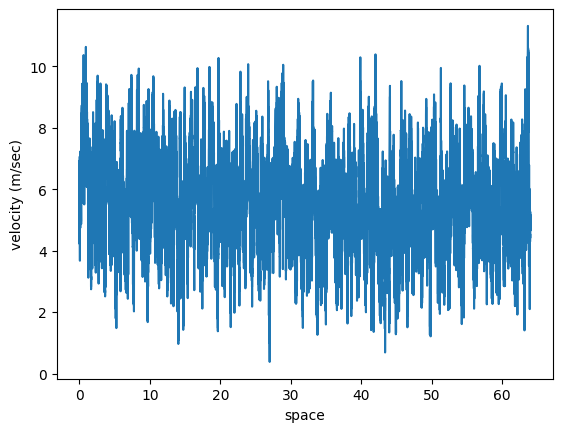

In [35]:
v=readjetfile("F:\Env Fluid Mechanics\courses\Signal\Signal/jet/K570.100")
%matplotlib inline

x = np.linspace(0,64,1048576)
plt.figure()
fig,ax = plt.subplots()
plt.plot(x,v)
ax.set_xlabel("space (m)")
ax.set_ylabel("velocity (m/sec)") #instantaneous velocity
#...

2. Compute the average and standard deviation of the velocity. Compute the fluctuation rate which is the ratio of the previous quantities. Estimate the PDF. What law does it follow approximately ?

5.5309048291266265
1.4904295252142172
0.26947300148167036


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

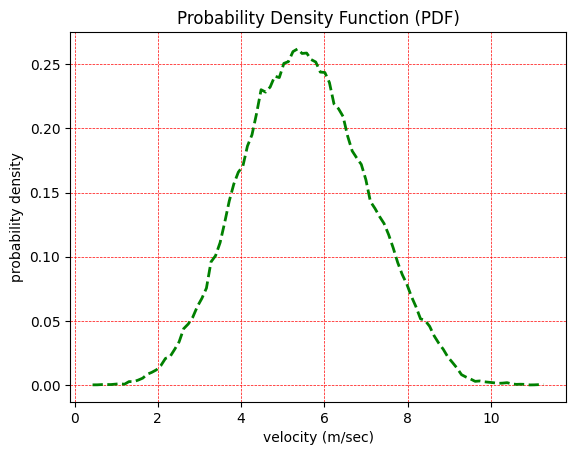

In [68]:
type(v)
mu = v.mean()
sigma = v.std()
fluctutation_rate = sigma/mu
print(mu)
print(sigma)
print(fluctutation_rate)
P,n = np.histogram(v,bins=100,density = True)
plt.figure()
u = (n[0:-1]+n[1:])/2
#plt.hist(v)
plt.figure()
fig,ax = plt.subplots()
plt.plot(u,P, color='green', linestyle='dashed',
     linewidth=2, markersize=12)
ax.set(xlabel= "velocity (m/sec)" , ylabel= "probability density",
       title = "Probability Density Function (PDF)")
ax.grid(color='r', linestyle='--', linewidth=0.5)
plt.show()

It follows a normal distribution/Gaussian distribution as the distribution is symmetric about mean.

3. Recompute the average and standard deviation using the PDF. Explain your computation 

In [71]:
u

array([ 0.43219248,  0.54157901,  0.65096553,  0.76035206,  0.86973858,
        0.9791251 ,  1.08851163,  1.19789815,  1.30728468,  1.4166712 ,
        1.52605772,  1.63544425,  1.74483077,  1.8542173 ,  1.96360382,
        2.07299034,  2.18237687,  2.29176339,  2.40114992,  2.51053644,
        2.61992296,  2.72930949,  2.83869601,  2.94808254,  3.05746906,
        3.16685558,  3.27624211,  3.38562863,  3.49501516,  3.60440168,
        3.7137882 ,  3.82317473,  3.93256125,  4.04194778,  4.1513343 ,
        4.26072082,  4.37010735,  4.47949387,  4.5888804 ,  4.69826692,
        4.80765344,  4.91703997,  5.02642649,  5.13581302,  5.24519954,
        5.35458606,  5.46397259,  5.57335911,  5.68274563,  5.79213216,
        5.90151868,  6.01090521,  6.12029173,  6.22967825,  6.33906478,
        6.4484513 ,  6.55783783,  6.66722435,  6.77661087,  6.8859974 ,
        6.99538392,  7.10477045,  7.21415697,  7.32354349,  7.43293002,
        7.54231654,  7.65170307,  7.76108959,  7.87047611,  7.97

In [116]:
#P.shape, u.shape this confirms that both are of the same size
#discrete sum to calculate the mean
mean_rec = 0.0 # we can develope the shape same as the shape for p
du = u[1]-u[0]
avg_rec = np.sum(P*u)*du 
avg_rec

var = np.sum(u**2*P)*(du)
std_rec = np.sqrt(var - (avg_rec)**2)
print(avg_rec)
print(std_rec)

5.530950051084205
1.4907399995436421


4. Compute the correlation function of the centered signal $v-\langle v\rangle$. Show it in a figure as a function of the space lag. 

In [155]:
l

array([-63.963075, -63.963014, -63.962953, ...,  63.962953,  63.963014,
        63.963075])

<Figure size 640x480 with 0 Axes>

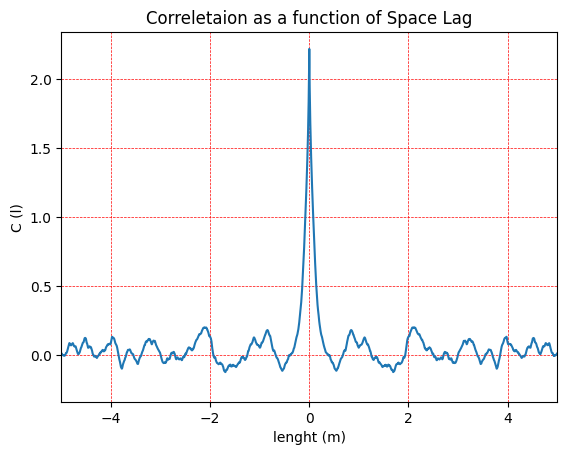

In [152]:
v_dash = v - mu
N = 2**20
dx = 6.1E-5
l = np.linspace(-N+1,N-1,2*N-1)*(dx)
covar = sig.correlate(v_dash,v_dash)
cov = covar/N
plt.figure()
fig,ax = plt.subplots()
plt.plot(l,cov,label='Correlation')
ax.set(xlabel= "lenght (m)" , ylabel= "C (l)",
       title = "Correletaion as a function of Space Lag")
plt.xlim(-5,5)
ax.grid(color='r', linestyle='--', linewidth=0.5)

5. Estimate the characteristic length $L$. Compare the decay to the theoretical prediction of the Orstein-Uhlenbeck process. Comment. 

In [153]:
T = sum(covar[l:l+4])
print(T)

TypeError: only integer scalar arrays can be converted to a scalar index

6. Define and compute the Reynolds number. Is it consistent with the fact that the flow is turbulent ?

7. Compute the power spectrum using `sig.welch`. Show the result in a figure in log-log scale. Comment. Beware the `nperseg` parameter has to be long enough to observe all the features. Discuss the effects of increasing or lowering this parameter.

8. The theoretical prediction for the decay as a function of the (spatial) frequency $k$ is the famous Kolmogorov spectrum which is supposed to decay as $\propto k^{-5/3}$ in the inertial range. Is it consistent with your estimate ? Justify it graphically. Compare to a Orstein-Uhlenbeck process with same standard deviation and same typical lengthscale.

In [ ]:
plt.figure()
plt.loglog(k, P * k ** (5 / 3))
plt.grid()
plt.ylabel("P*k**(5/3)")
plt.xlabel("k");
print('the compensated spectrum shows a plateau, confirming the k**(-5/3) scaling')

9. The convergence of the previous results can be improved by averaging over several files. Average the results over several files (all ?) to improve the convergence of the PDF and the spectrum. It should allow you to use a larger value of `nperseg` to better see the low frequency part of the spectrum. Beware of the normalization of the averages.

In [ ]:
# number of files
Nbf = 10

# you should include your calculation in a loop like the onde below:
for ii in range(1, Nbf + 1):
    fname = f"D:/Zautres/TP_signal/jet/K570/K570.{ii:03d}"
    print(fname, f"({ii}/{Nbf})", end="\r")
    v = readjetfile(fname)
    #...

10. Discuss the differents regimes observed on the spectrum and the possible physical/technical reasons for the transitions between these regimes. Gives the values of $k$ that limits the various regimes.

11. Using finite differences, compute the component of the velocity gradient $g=\dfrac{dv_x}{dx}$. Compute and show the PDF of $g$. Comment. 

12. Compute the normalised moments of $g$ up to 4th order. For homogeneous turbulence, the viscous dissipation rate per unit mass is $\epsilon=15 \nu \langle g^2 \rangle$ where $\nu$ is the kinematic viscosity of the fluid (air here). Compute an estimate of $\epsilon$.

13. Compute an estimate of the Kolmogorov constant $B_0$ defined as $E(k)=B_0 \epsilon^{2/3}k^{-5/3}$.

14. Compute the characteristic length scale of the gradient. Is it possible to use the standard definition ? Note the following theoretical result: for a random variable which is the derivative of a stationary random variable, then $\int_0^\infty c(\tau) d\tau=0$. Propose an alternative definition for the characteristic time.

15. One of the few analytical results in homogeneous turbulence theory is the so-called 4/5 law:
$$\langle (v_x(x+r)-v_x(x))^3\rangle=-\frac{4}{5}\epsilon r$$ where $r$ is a spatial separation between two points. Note that due to the way the Taylor hypothesis has been applied in the files the sign is changed. 

Check if this law is verified with this data. A way to restrict the number of values of r is to take r spaced logarithmically (you can use the function ``np.logspace`` or just take indices that are powers of 2 or of $\sqrt{2}$ for instance). It is better for statistical convergence to average over a few files. Show the result in a figure and comment. Figures maybe more explicit if plotted in semilog or loglog scale.

16. What is the limit of $\langle (v_x(x+r)-v_x(x))^3\rangle$ when $r\rightarrow 0$ and when $r\rightarrow +\infty$ ? Is it consistent with your estimate ? 

---
# Signals from numerical Lagrangian data of homogeneous turbulence
You can download files from the output of a direct numerical numerical simulation of homogeneous turbulence. The flow is computed from the Navier-Stokes equations. The flow is seeded with Lagrangian tracers i.e. virtual particles with no inertia that follow passively the flow. These are thus Lagrangian markers of the fluid and the numerical codes records the trajectories of the particles as a function of time as well as their velocity. Each file contain the velocity data of 1920 particles over 1840 time steps. The names of the files are 'Vit.tetra.0.100' to 'Vit.tetra.0.199'. The function to read the files is below. It outputs the 3 components of velocity (`vx, vy, vz`), a time vector `t`, and the time step `dt`. `vx, vy, vz` are arrays of size 1920x1840. Units are arbitrary and not really physical.

In [ ]:
import struct

def readlagfile(fname):
    Nt = 1840
    Np = 1920
    dt = 0.0023
    with open(fname, "rb") as file:
        dataraw = file.read()
    st = f">{Nt * Np * 3}f"
    data = np.array(struct.unpack(st, dataraw))
    data1 = data.reshape(3 * Np, -1)
    vx = data1[0:Np, :]
    vy = data1[Np : 2 * Np, :]
    vz = data1[2 * Np : 3 * Np, :]

    t = np.linspace(0, Nt - 1, Nt) * dt
    return vx, vy, vz, t, dt

1. Load a file and, for one particle, show the 3 components as a fonction of time in a figure

In [ ]:
vx, vy, vz, t, dt = readlagfile("D:\Zautres\TP_signal\particles\Vit.tetra.0.100")
#...

2. Compute the standard deviation of each component. Compute the velocity PDF for each component. Show the result in a figure and comment. Using several files will improve the statistical convergence but the calculation can be (very) long.

3. Compute the autocorrelation for each component. Estimate the characteristic time scale for each component. Show the result in a figure and comment. How does it compare to the Orstein-Uhlenbeck process with the same parameters ? You may average over several files for a better statistical convergence (but the calculation are lengthy).

4. Compute the power spectrum for each component. Here, rather, than using the welch method, you should rather average over the particles. You can still use the `sig.welch` but use `nperseg=1840`. Show the result and comment. Dimensional analysis in the spirit of the Kolmogorov theory of turbulence predicts that the velocity spectrum should decay as $1/\omega^2$. Is it consistent with your data ? You may average over several files for a better statistical convergence. 

5. Compare with the prediction of a Orstein-Uhlenbeck process. Comment.

6. Compare the spectrum computed with a Hanning window and the spectrum computed with a `boxcar` window (rectangular)

7. Using simple finite difference, compute the acceleration component of the particle. Show one example of the time series of the three components of acceleration (samme data as in question 1).

8. Compute the PDF of the acceleration components. Display the PDF in semilogy scale. Compute the normalized and centralized 4th order moment. Comment.

9. Compute the characteristic time scale of acceleration. Is it possible to use the standard definition ? Propose an alternative definition. Note that $\int_{-\infty}^{+\infty}R_a(\tau) d\tau=0$ because the acceleration is (here) the derivative of a stationary process.

10: Compute the joint probability $P(a_x,a_y)$. Show the result in a figure.

11. Show numerically that $a_x$ and $a_y$ are not statistically independent random variables. Comment.

12. Compute the distribution of $a=|\vec a|$. By what distribution can one approximate it ?

13. Compute the joint probability of $v=|\mathbf v|$ and $a=|\mathbf a|$. Display it in a figure.

14. Compute the conditional average $\langle a^2|v\rangle$. A prediction "à la Kolmogorov" is $\langle a^2|v\rangle \propto u^{9/2}$. Is it consistent with your estimation ?